In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
Outbound = pd.read_excel('Outbound2.xlsx')
Outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27436 entries, 0 to 27435
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             27436 non-null  int64 
 1   Customer Code  27436 non-null  object
 2   Itemlink       27436 non-null  int64 
 3   Itemcode       27436 non-null  int64 
 4   Description    27436 non-null  object
 5   Qty            27436 non-null  int64 
 6   Date           27436 non-null  int64 
 7   SKUlink        27436 non-null  int64 
 8   SKUnumber      27436 non-null  int64 
 9   Department     27436 non-null  object
 10  Item Desc      27436 non-null  object
 11  UOM            27436 non-null  object
 12  ctn conv       27436 non-null  int64 
 13  Hi             27436 non-null  int64 
 14  Ti             27436 non-null  int64 
 15  pallet conv    27436 non-null  int64 
 16  Store Code     27436 non-null  object
dtypes: int64(11), object(6)
memory usage: 3.6+ MB


In [3]:
MasterData = pd.read_excel('Master Data R1.xlsx')
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SKUlink        189 non-null    int64  
 1   SKUnumber      189 non-null    int64  
 2   Category       189 non-null    object 
 3   Item Desc      189 non-null    object 
 4   UOM            189 non-null    object 
 5   ctn conv       189 non-null    int64  
 6   Hi             189 non-null    int64  
 7   Ti             189 non-null    int64  
 8   pallet conv    189 non-null    int64  
 9   Avg UnitPrice  189 non-null    float64
dtypes: float64(1), int64(6), object(3)
memory usage: 14.9+ KB


In [4]:
Outbound['Date'] = pd.to_datetime(Outbound['Date'], format='%Y%m%d')
Outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27436 entries, 0 to 27435
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   No             27436 non-null  int64         
 1   Customer Code  27436 non-null  object        
 2   Itemlink       27436 non-null  int64         
 3   Itemcode       27436 non-null  int64         
 4   Description    27436 non-null  object        
 5   Qty            27436 non-null  int64         
 6   Date           27436 non-null  datetime64[ns]
 7   SKUlink        27436 non-null  int64         
 8   SKUnumber      27436 non-null  int64         
 9   Department     27436 non-null  object        
 10  Item Desc      27436 non-null  object        
 11  UOM            27436 non-null  object        
 12  ctn conv       27436 non-null  int64         
 13  Hi             27436 non-null  int64         
 14  Ti             27436 non-null  int64         
 15  pallet conv    2743

In [5]:
Outbound = pd.pivot_table(Outbound, index=['Date', 'Store Code', 'SKUlink', 'SKUnumber', 'Item Desc'], values='Qty', aggfunc='sum', fill_value=0)
Outbound.reset_index(inplace=True)
Outbound.columns.name = None
Outbound.index.name = None
Outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27436 entries, 0 to 27435
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        27436 non-null  datetime64[ns]
 1   Store Code  27436 non-null  object        
 2   SKUlink     27436 non-null  int64         
 3   SKUnumber   27436 non-null  int64         
 4   Item Desc   27436 non-null  object        
 5   Qty         27436 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.3+ MB


In [6]:
Outbound = Outbound.merge(MasterData, on=['SKUlink', 'SKUnumber', 'Item Desc'], how='left')
Outbound.reset_index(drop=True, inplace=True)
Outbound['Month'] = Outbound['Date'].dt.strftime('%B')
Outbound['Weekday'] = Outbound['Date'].dt.day_name()
Outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27436 entries, 0 to 27435
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           27436 non-null  datetime64[ns]
 1   Store Code     27436 non-null  object        
 2   SKUlink        27436 non-null  int64         
 3   SKUnumber      27436 non-null  int64         
 4   Item Desc      27436 non-null  object        
 5   Qty            27436 non-null  int64         
 6   Category       27436 non-null  object        
 7   UOM            27436 non-null  object        
 8   ctn conv       27436 non-null  int64         
 9   Hi             27436 non-null  int64         
 10  Ti             27436 non-null  int64         
 11  pallet conv    27436 non-null  int64         
 12  Avg UnitPrice  27436 non-null  float64       
 13  Month          27436 non-null  object        
 14  Weekday        27436 non-null  object        
dtypes: datetime64[ns](1

In [7]:
Outbound1 = Outbound[Outbound['Qty'] >= 0].copy()

conditions = [Outbound1['Qty'] > 0,
              Outbound1['Qty'] == 0]

choices = ['Delivery', 'Failed Delivery']

Outbound1['Type'] = np.select(conditions, choices, default="no inbound")
Outbound1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27161 entries, 0 to 27435
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           27161 non-null  datetime64[ns]
 1   Store Code     27161 non-null  object        
 2   SKUlink        27161 non-null  int64         
 3   SKUnumber      27161 non-null  int64         
 4   Item Desc      27161 non-null  object        
 5   Qty            27161 non-null  int64         
 6   Category       27161 non-null  object        
 7   UOM            27161 non-null  object        
 8   ctn conv       27161 non-null  int64         
 9   Hi             27161 non-null  int64         
 10  Ti             27161 non-null  int64         
 11  pallet conv    27161 non-null  int64         
 12  Avg UnitPrice  27161 non-null  float64       
 13  Month          27161 non-null  object        
 14  Weekday        27161 non-null  object        
 15  Type           27161 non

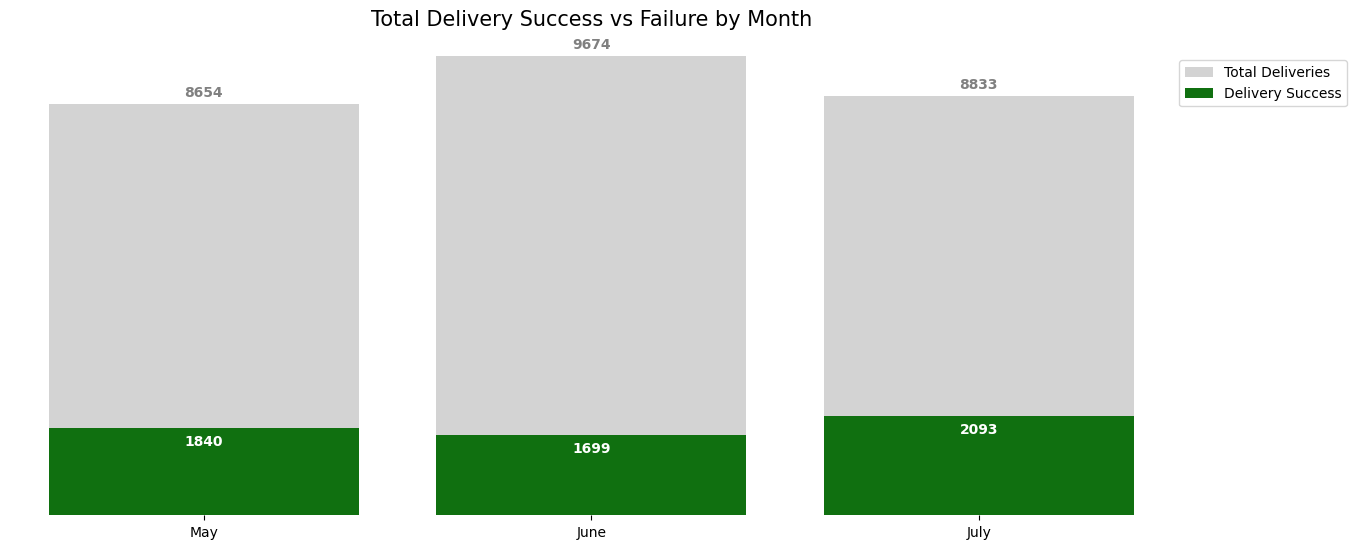

In [8]:
# Prepare data
total = Outbound1.groupby('Month').size().reindex(['May', 'June', 'July']).dropna()
delivery = Outbound1[Outbound1['Type'] == 'Delivery']['Month'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

# Background
ax1 = sns.barplot(x=total.index, y=total.values, color='lightgrey', label='Total Deliveries')
ax1.bar_label(ax1.containers[0], padding=3, color='grey', fontweight='bold')

# Foreground
ax2 = sns.barplot(x=delivery.index, y=delivery.values, color='green', label='Delivery Success')
ax2.bar_label(ax2.containers[1], padding=-15, color='white', fontweight='bold')

# Remove all outer border of the plot
ax1.yaxis.set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)

plt.title('Total Delivery Success vs Failure by Month', fontsize=15, pad=20)
plt.ylim(0, total.max() + 50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('')
plt.show()

- Observation: July 2023 recorded the highest Order Fulfill Rate (24%) within the 3-month period. Although total order volume decreased to 8,833 lines, the data indicates a clear improvement in operational efficiency compared to June 2023.
- Bottleneck: The 76% non-fulfillment rate remains significantly below industry benchmarks for retail logistics.
- Insight: These consistent delivery failures created "inventory gaps" at retail outlets. This leads to chronic out of stock (OOS) scenarios, which directly impact the overall revenue and increase the cost to serve due to repeated, unsuccessful logistics attempts.
- Suggestion: A Picking Process Review must be prioritize especially on an Efficiency Study to understand why 76% of orders are not leaving the warehouse.

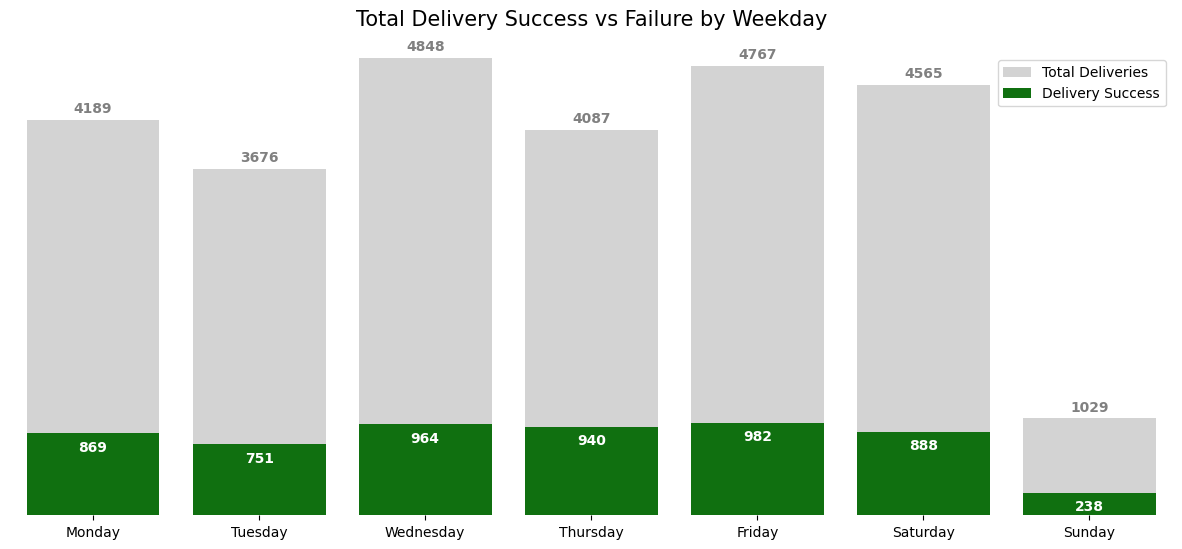

In [9]:
# Prepare data
total = Outbound1.groupby('Weekday').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).dropna()
delivery = Outbound1[Outbound1['Type'] == 'Delivery']['Weekday'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

# Background
ax1 = sns.barplot(x=total.index, y=total.values, color='lightgrey', label='Total Deliveries')
ax1.bar_label(ax1.containers[0], padding=3, color='grey', fontweight='bold')

# Foreground
ax2 = sns.barplot(x=delivery.index, y=delivery.values, color='green', label='Delivery Success')
ax2.bar_label(ax2.containers[1], padding=-15, color='white', fontweight='bold')

# Remove all outer border of the plot
ax1.yaxis.set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)

plt.title('Total Delivery Success vs Failure by Weekday', fontsize=15, pad=20)
plt.ylim(0, total.max() + 50)
plt.legend()
plt.xlabel('')
plt.show()

- Observation: Historical data from the past three months indicates an average 21% Order Fulfill Rate across all weekdays. The warehouse throughput appears to be physically constrained to a maximum of approximately 82 successful transactions per day.
- Bottleneck: Wednesday represents the most significant operational challenge, accounting for the highest volume of unfulfilled order lines within the weekly cycle.
- Insight: The current outbound processes are reactive rather than planned, leading to a congested mid-week.
- Suggestion: A Time and Motion Study should be conducted to identify if the delay is happened due to excessive travelling time, packing slowness, or stock availability.

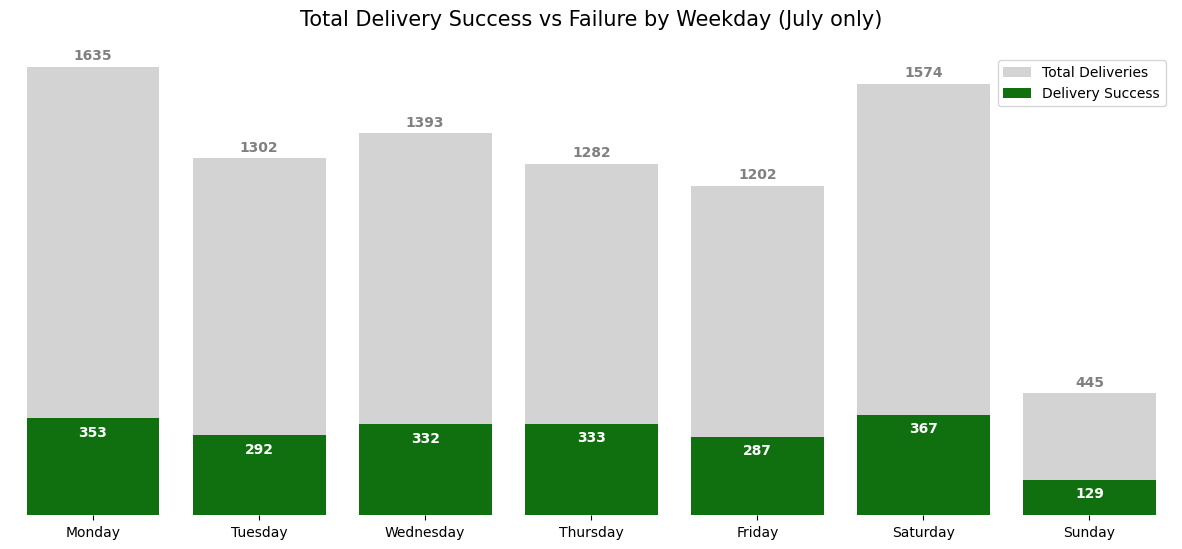

In [10]:
July = Outbound1[Outbound1['Month'] == 'July'].copy()

# Prepare data
total = July.groupby('Weekday').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).dropna()
delivery = July[July['Type'] == 'Delivery']['Weekday'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

# Background
ax1 = sns.barplot(x=total.index, y=total.values, color='lightgrey', label='Total Deliveries')
ax1.bar_label(ax1.containers[0], padding=3, color='grey', fontweight='bold')

# Foreground
ax2 = sns.barplot(x=delivery.index, y=delivery.values, color='green', label='Delivery Success')
ax2.bar_label(ax2.containers[1], padding=-15, color='white', fontweight='bold')

# Remove all outer border of the plot
ax1.yaxis.set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)

plt.title('Total Delivery Success vs Failure by Weekday (July only)', fontsize=15, pad=20)
plt.ylim(0, total.max() + 50)
plt.legend()
plt.xlabel('')
plt.show()

- Observation: July data shows a shift in demand patterns compared to the 3-month average. Monday and Saturday have emerged as the primary high-volume days, while the overall fulfillment rate has stabilized.
- Bottleneck: Sunday remains the lowest demand day, yet it continues to consume operational overhead and labour hours without generating significant output.
- Insight: Maintaining full operations on Sunday is inefficient. The labour schedule should align with the actual demand peaks on Monday and Saturday.
- Suggestion: Sunday operations should be shutdown and relocating that resources to Monday. This would increase the "capcity ceiling" on the busiest day without increasing total payroll. Alternatively, Sunday shifts could be used for pre-picking the Monday rush.

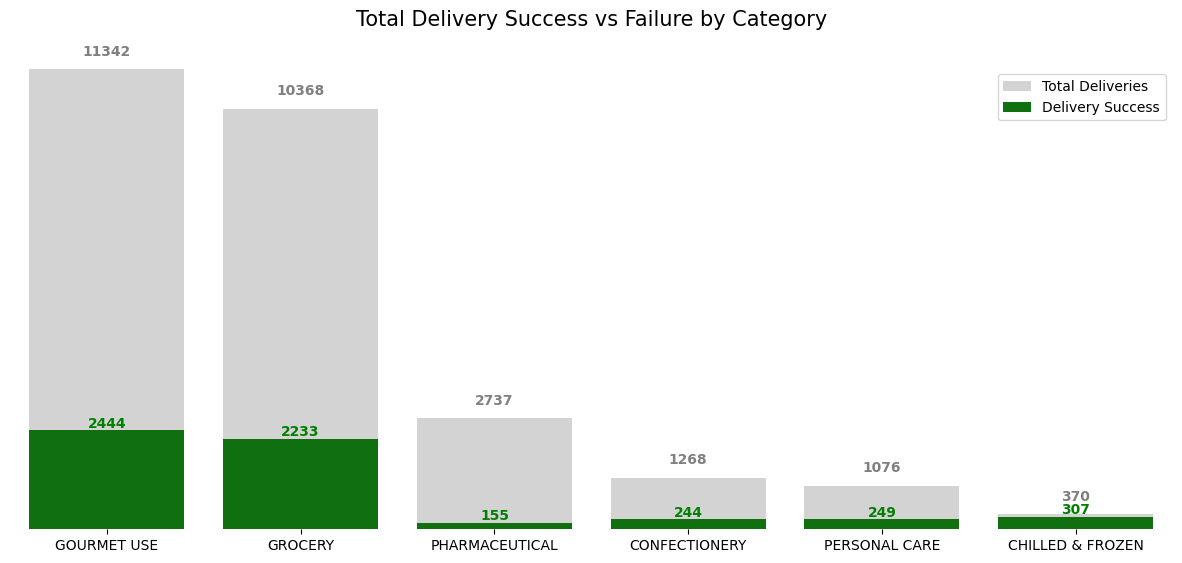

In [11]:
# Prepare data
total = Outbound1['Category'].value_counts().sort_index()
total = total.sort_values(ascending=False)
delivery = Outbound1[Outbound1['Type'] == 'Delivery']['Category'].value_counts().sort_index()

plt.figure(figsize=(15, 6))

# Background
ax1 = sns.barplot(x=total.index, y=total.values, color='lightgrey', label='Total Deliveries')
ax1.bar_label(ax1.containers[0], padding=8, color='grey', fontweight='bold')

# Foreground
ax2 = sns.barplot(x=delivery.index, y=delivery.values, color='green', label='Delivery Success')
ax2.bar_label(ax2.containers[1], color='green', fontweight='bold')

# Remove all outer border of the plot
ax1.yaxis.set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)

plt.title('Total Delivery Success vs Failure by Category', fontsize=15, pad=30)
plt.ylim(0, total.max() + 50)
plt.legend()
plt.xlabel('')
plt.show()

- Observation: Fulfillment performance is vaires drastically by category. "CHILLED & FROZEN" leads with an 83% success rate (307 of 370 lines), whereas "PHARMACEUTICAL" shows a critical service failure with only a 6% success rate. High-volume categories such as "GOURMET USE" and "GROCERY" average only 21.5% success rate, accounting for bulk of unfulfilled demand.
- Bottleneck: The failure in "GOURMET USE" (11,342 lines) and "GROCERY" (10,368 lines) is driven by sheer volume overwhelming the current resources. Conversely, the "PHARMACEUTICAL" failure to be a process constraint, likely due to specific picking protocols or security requirements. 
- Insight: The success in "CHILLED & FROZEN" proves that the warehouse can handle a specialized zone well. The issue in "GOURMET USE" and "GROCERY" is a scalability, while the issue in "PHARMACEUTICAL" is process. The high volume is currently being sacrificed due to the lack of a specialized high-density picking strategy.
- Suggestion: Picking strategy is required to be replanned and training is required especially in the "PHARMACEUTICAL" zone to address the process failure.

In [12]:
Outbound['Total Unit'] = np.where(
    Outbound['UOM'] == 'carton',
    Outbound['Qty'] * Outbound['ctn conv'],
    Outbound['Qty'])
Outbound['Pallets'] = np.where(
    (Outbound['Total Unit'] / Outbound['ctn conv'] / Outbound['pallet conv']) > 1,
    np.floor(Outbound['Total Unit'] / Outbound['ctn conv'] / Outbound['pallet conv']),
    0)
Outbound['Cartons'] = np.where(
    ((Outbound['Total Unit'] - Outbound['Pallets'] * Outbound['ctn conv'] * Outbound['pallet conv']) / Outbound['ctn conv']) > 1,
    np.floor((Outbound['Total Unit'] - Outbound['Pallets'] * Outbound['ctn conv'] * Outbound['pallet conv']) / Outbound['ctn conv']),
    0)
Outbound['Units'] = np.where(
    (Outbound['Total Unit'] - (Outbound['Pallets'] * Outbound['ctn conv'] * Outbound['pallet conv']) - (Outbound['Cartons'] * Outbound['ctn conv'])) > 1,
    Outbound['Total Unit'] - (Outbound['Pallets'] * Outbound['ctn conv'] * Outbound['pallet conv']) - (Outbound['Cartons'] * Outbound['ctn conv']),
    0)
Outbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27436 entries, 0 to 27435
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           27436 non-null  datetime64[ns]
 1   Store Code     27436 non-null  object        
 2   SKUlink        27436 non-null  int64         
 3   SKUnumber      27436 non-null  int64         
 4   Item Desc      27436 non-null  object        
 5   Qty            27436 non-null  int64         
 6   Category       27436 non-null  object        
 7   UOM            27436 non-null  object        
 8   ctn conv       27436 non-null  int64         
 9   Hi             27436 non-null  int64         
 10  Ti             27436 non-null  int64         
 11  pallet conv    27436 non-null  int64         
 12  Avg UnitPrice  27436 non-null  float64       
 13  Month          27436 non-null  object        
 14  Weekday        27436 non-null  object        
 15  Total Unit     2743

In [13]:
total_pallets = Outbound['Pallets'].sum()
total_cartons = Outbound['Cartons'].sum()
total_units = Outbound['Units'].sum()

OutboundProfile = pd.DataFrame({'Outbound Profile': ['Pallets', 'Cartons', 'Units'],
                               'Outbound by Order': [total_pallets, total_cartons, total_units]})
OutboundProfile

,Outbound Profile,Outbound by Order
0,Pallets,0.0
1,Cartons,4712.0
2,Units,58595.0


In [14]:
consolidatedOutbound = pd.pivot_table(Outbound, index=['Date', 'SKUlink', 'SKUnumber', 'Item Desc', 'Category', 'UOM', 'ctn conv', 'Hi', 'Ti', 'pallet conv'], 
                                      values='Qty', aggfunc='sum', fill_value=0)
consolidatedOutbound.reset_index(inplace=True)
consolidatedOutbound.columns.name = None
consolidatedOutbound.index.name = None
consolidatedOutbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8957 entries, 0 to 8956
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8957 non-null   datetime64[ns]
 1   SKUlink      8957 non-null   int64         
 2   SKUnumber    8957 non-null   int64         
 3   Item Desc    8957 non-null   object        
 4   Category     8957 non-null   object        
 5   UOM          8957 non-null   object        
 6   ctn conv     8957 non-null   int64         
 7   Hi           8957 non-null   int64         
 8   Ti           8957 non-null   int64         
 9   pallet conv  8957 non-null   int64         
 10  Qty          8957 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 769.9+ KB


In [15]:
consolidatedOutbound['Total Unit'] = np.where(
    consolidatedOutbound['UOM'] == 'carton',
    consolidatedOutbound['Qty'] * consolidatedOutbound['ctn conv'],
    consolidatedOutbound['Qty'])
consolidatedOutbound['consPallets'] = np.where(
    (consolidatedOutbound['Total Unit'] / consolidatedOutbound['ctn conv'] / consolidatedOutbound['pallet conv']) > 1,
    np.floor(consolidatedOutbound['Total Unit'] / consolidatedOutbound['ctn conv'] / consolidatedOutbound['pallet conv']),
    0)
consolidatedOutbound['consCartons'] = np.where(
    ((consolidatedOutbound['Total Unit'] - consolidatedOutbound['consPallets'] * consolidatedOutbound['ctn conv'] * consolidatedOutbound['pallet conv']) / consolidatedOutbound['ctn conv']) > 1,
    np.floor((consolidatedOutbound['Total Unit'] - consolidatedOutbound['consPallets'] * consolidatedOutbound['ctn conv'] * consolidatedOutbound['pallet conv']) / consolidatedOutbound['ctn conv']),
    0)
consolidatedOutbound['consUnits'] = np.where(
    (consolidatedOutbound['Total Unit'] - (consolidatedOutbound['consPallets'] * consolidatedOutbound['ctn conv'] * consolidatedOutbound['pallet conv']) - (consolidatedOutbound['consCartons'] * consolidatedOutbound['ctn conv'])) > 1,
    consolidatedOutbound['Total Unit'] - (consolidatedOutbound['consPallets'] * consolidatedOutbound['ctn conv'] * consolidatedOutbound['pallet conv']) - (consolidatedOutbound['consCartons'] * consolidatedOutbound['ctn conv']),
    0)
consolidatedOutbound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8957 entries, 0 to 8956
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8957 non-null   datetime64[ns]
 1   SKUlink      8957 non-null   int64         
 2   SKUnumber    8957 non-null   int64         
 3   Item Desc    8957 non-null   object        
 4   Category     8957 non-null   object        
 5   UOM          8957 non-null   object        
 6   ctn conv     8957 non-null   int64         
 7   Hi           8957 non-null   int64         
 8   Ti           8957 non-null   int64         
 9   pallet conv  8957 non-null   int64         
 10  Qty          8957 non-null   int64         
 11  Total Unit   8957 non-null   int64         
 12  consPallets  8957 non-null   float64       
 13  consCartons  8957 non-null   float64       
 14  consUnits    8957 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(8), object(3)
m

In [16]:
total_pallets = consolidatedOutbound['consPallets'].sum()
total_cartons = consolidatedOutbound['consCartons'].sum()
total_units = consolidatedOutbound['consUnits'].sum()

consOutboundProfile = pd.DataFrame({'Outbound Profile': ['Pallets', 'Cartons', 'Units'],
                               'Consolidated Outbound': [total_pallets, total_cartons, total_units]})
consOutboundProfile

,Outbound Profile,Consolidated Outbound
0,Pallets,8.0
1,Cartons,6838.0
2,Units,25295.0


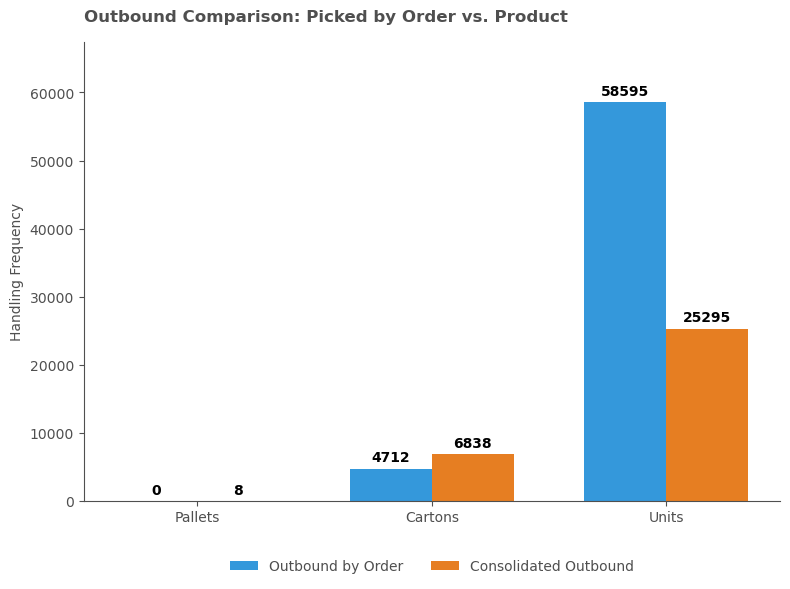

In [17]:
out_comparison = OutboundProfile.merge(consOutboundProfile, on='Outbound Profile', how='left')
out_comparison.reset_index(drop=True, inplace=True)
out_comparison

labels = out_comparison['Outbound Profile']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(x - width/2, out_comparison['Outbound by Order'], width, label='Outbound by Order', color='#3498db')
bar2 = ax.bar(x + width/2, out_comparison['Consolidated Outbound'], width, label='Consolidated Outbound', color='#e67e22')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#4F4F4F')
ax.spines['bottom'].set_color('#4F4F4F')

ax.tick_params(axis='both', colors='#4F4F4F')
ax.set_ylabel('Handling Frequency', color='#4F4F4F')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_title('Outbound Comparison: Picked by Order vs. Product', pad=15, loc='left', fontweight='bold', color='#4F4F4F')

ax.set_ylim(0, max(out_comparison['Outbound by Order'].max(), out_comparison['Consolidated Outbound'].max()) * 1.15)

ax.bar_label(bar1, padding=3, color='black', fontweight='bold')
ax.bar_label(bar2, padding=3, color='black', fontweight='bold')

ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, labelcolor='#4F4F4F')

plt.tight_layout()
plt.show()

- Observation: By simulating an "Pick by Product" model, the total Handling Frequency is reduced by 49% (droppig from 63,307 to 32,141 touches).
- Bottleneck: The current "Pick by Order" is highly inefficient for high-velocity items. It forces pickers to visit the same location multiple times for different orders, resulting in redundant travel.
- Insight: The efficiency gain from consolidation outweighs the additional time required for sorting at the dock. This trade-off significantly optimize both labour hours and MHE (Material Handling Equipment) usage.
- Suggestion: To immediately improve throughput, the operation model should transition to a "Pick by Product" method for high-volume categories. 

In [18]:
ABCAnalysis = Outbound[Outbound['Total Unit'] > 0]
ABCAnalysis = pd.pivot_table(ABCAnalysis, index=['SKUlink', 'Item Desc', 'Avg UnitPrice'], 
                             values='Total Unit', aggfunc='sum', fill_value=0)
ABCAnalysis.reset_index(inplace=True)
ABCAnalysis.columns.name = None
ABCAnalysis.index.name = None
ABCAnalysis['Total Revenue'] = ABCAnalysis['Avg UnitPrice'] * ABCAnalysis['Total Unit']
ABCAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SKUlink        181 non-null    int64  
 1   Item Desc      181 non-null    object 
 2   Avg UnitPrice  181 non-null    float64
 3   Total Unit     181 non-null    int64  
 4   Total Revenue  181 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.2+ KB


In [19]:
ABCAnalysis = ABCAnalysis.sort_values(by='Total Revenue', ascending=False)
ABCAnalysis['Cum Revenue'] = ABCAnalysis['Total Revenue'].cumsum()
ABCAnalysis['Cum Contribution'] = (ABCAnalysis['Cum Revenue'] / ABCAnalysis['Total Revenue'].sum()) * 100

def map_abc(percentage):
    if percentage <= 70: 
        return 'A'
    elif percentage <= 90: 
        return 'B'
    else: 
        return 'C'

ABCAnalysis['ABC Class'] = ABCAnalysis['Cum Contribution'].apply(map_abc)
ABCAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 152 to 78
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKUlink           181 non-null    int64  
 1   Item Desc         181 non-null    object 
 2   Avg UnitPrice     181 non-null    float64
 3   Total Unit        181 non-null    int64  
 4   Total Revenue     181 non-null    float64
 5   Cum Revenue       181 non-null    float64
 6   Cum Contribution  181 non-null    float64
 7   ABC Class         181 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 12.7+ KB


In [20]:
XYZAnalysis = Outbound[Outbound['Total Unit'] > 0]
XYZAnalysis = pd.pivot_table(XYZAnalysis, index=['SKUlink', 'Item Desc'], columns='Month',
                             values='Total Unit', aggfunc='sum', fill_value=0)

XYZAnalysis['Std Dev'] = XYZAnalysis.std(axis=1)
XYZAnalysis['Avg Demand'] = XYZAnalysis.mean(axis=1)
XYZAnalysis['CV'] = XYZAnalysis['Std Dev'] / XYZAnalysis['Avg Demand']
XYZAnalysis['CV'] = XYZAnalysis['CV'].fillna(0)

def map_xyz(cv):
    if cv <= 0.5: 
        return 'X'
    elif cv <= 1.0: 
        return 'Y' 
    else: 
        return 'Z'

XYZAnalysis['XYZ Class'] = XYZAnalysis['CV'].apply(map_xyz)
XYZAnalysis.reset_index(inplace=True)
XYZAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKUlink     181 non-null    int64  
 1   Item Desc   181 non-null    object 
 2   July        181 non-null    int64  
 3   June        181 non-null    int64  
 4   May         181 non-null    int64  
 5   Std Dev     181 non-null    float64
 6   Avg Demand  181 non-null    float64
 7   CV          181 non-null    float64
 8   XYZ Class   181 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 12.9+ KB


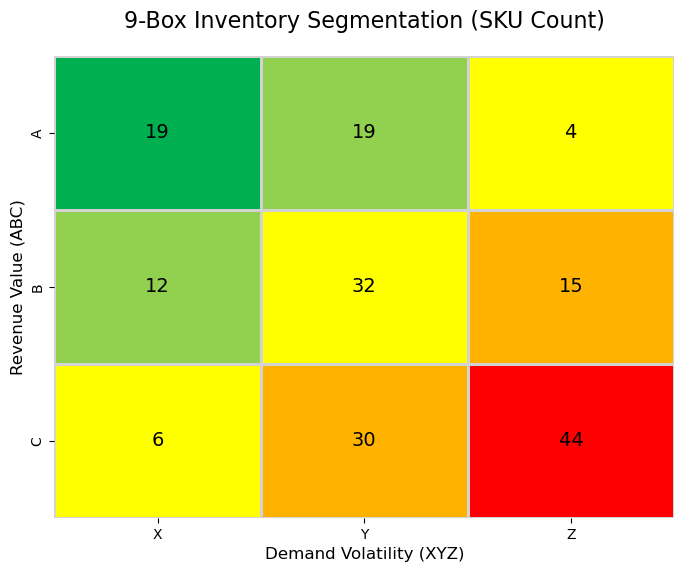

In [32]:
ABCvsXYZ = ABCAnalysis.merge(XYZAnalysis, on=['SKUlink', 'Item Desc'], how='left')
ABCvsXYZ.reset_index(drop=True, inplace=True)

ABCvsXYZ['9_Box'] = ABCvsXYZ['ABC Class'] + ABCvsXYZ['XYZ Class']

NineBox = ABCvsXYZ['9_Box'].value_counts().sort_index()
NineBox = pd.crosstab(ABCvsXYZ['ABC Class'], ABCvsXYZ['XYZ Class'])

NineBox = NineBox.reindex(index=['A', 'B', 'C'], columns=['X', 'Y', 'Z'])

color_data = [[4, 3, 2], 
              [3, 2, 1], 
              [2, 1, 0]]

custom_cmap = ListedColormap(['#FF0000', '#FFB300', '#FFFF00', '#92D050', '#00B050'])

plt.figure(figsize=(8, 6))

sns.heatmap(color_data, 
            annot=NineBox.values,
            fmt='d', 
            cmap=custom_cmap, 
            linewidths=1, 
            linecolor='lightgrey',
            cbar=False,
            xticklabels=['X', 'Y', 'Z'], 
            yticklabels=['A', 'B', 'C'],
            annot_kws={"size": 14, "color": "black"})

plt.title('9-Box Inventory Segmentation (SKU Count)', fontsize=16, pad=20)
plt.xlabel('Demand Volatility (XYZ)', fontsize=12)
plt.ylabel('Revenue Value (ABC)', fontsize=12)

plt.show()

- Observation: The warehouse maintains a very lean "A-Class" core with only 42 items (23%) driving the majority of revenue. Within this group, 38 items ("AX" and "AY") are relatively stable and predictable. However, the largest concentration of SKUs is in the "CZ" category (44 items) are low volume and unpredictable.
- Bottleneck: Holding more "CZ" items (44) than the entire "A-Class" items (42) means that the picking team is likely spending as much time navigating around "slow-movers" as they are managing the products tdrive revenue.
- Insight: The high success rate of "A" and "B" items in the stable "X" and "Y" categories suggests that the fulfillment failure is likely not a forecasting issue. The 44 "CZ" items are likely creating operational noise, cluttering the warehouse and slowing down the access to the 42 "A" items.
- Suggestion: The pick faces for 38 "AX" and "AY" items should be restructured and relocated closest to the loading dock. This will minimize travel time and help maximize the daily transaction limit.

Key Takeaways:

Phase 1:
1. Commission a Pick Process Review and Efficiency Study. The primary objective is to identify the root causes of the 76% Fulfillment Gap and eliminate the bottlenecks currently restricting throughput.
2. Suspend active outbound operations on Sundays to eliminate overhead waste. Reallocate resources to support weekday peaks or utilize Sunday shifts for strategic pre-picking and replenishment.

Phase 2:
1. Transition to High-Density Picking: Shift the "Pick by Order" to "Pick by Product". This is critical to resolving the volume-based process failures identified in high-velocity categories like "GOURMET USE" and "GROCERY".

Phase 3:
1. Restructure Pick Faces: Implement a Dynamic Slotting Strategy where high-velocity (AX/AY) SKUs are relocated to the "Nearest to Dispatch" zone to minimize travel time and maximize daily transaction capacity.